# Exploratory Data Analysis

Monica Canavan

In this notebook we will be performing EDA on data pertaining to educational attainment, demographics, and technology
(WORK IN PROGRESS)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the Data Files

In [2]:
# read in dataset for the EDD employment projections
# using excel format instead of csv.  edd_proj = pd.read_csv('edd_sacr_occproj_2018_2028.csv', sep='\t', encoding = 'utf-16')
edd_proj = pd.read_excel('EDD_SAC_OCCPROJ_2018_2028.xlsx', sheet_name='Occupational')

#read in dataset for the Census PUMA Educational Attainment with Race, Ethnicity and Gender RC
education = pd.read_excel('ACSST5Y2019_Educational_Attainment.xlsx', sheet_name='Education')

#read in dataset for the Census Technology Information RC
technology = pd.read_excel('ACSST1Y2019_Technology_RC.xlsx', sheet_name='Technology')

#read in dataset for the Census Technology Information RC
internet = pd.read_excel('ACSST1Y2019_Technology_RC.xlsx', sheet_name='Internet')

### Begin data review of EDD Occupation Projections

In [3]:
print(edd_proj.shape)

(635, 15)


edd_proj contains 635 rows and 15 columns

In [4]:
#Check first several rows
edd_proj.head()

,SOC Level,SOC Code,Occupational Title,Base Year Employment Estimate 2018,Projected Year Employment Estimate 2028,Numeric Change 2018-2028,Percent-age Change 2018-2028,Exits,Transfers,Total Job Openings,Median Hourly Wages,Median Annual Wages,Entry Level Education,Work Experience,On-the-Job Training
0,1,00-0000,"Total, All Occupations",1080300,1170600,90300,0.083606,493220,791980,1375520,21.99,45730,NaN,NaN,NaN
1,2,11-0000,Management Occupations,68940,74250,5310,0.077023,18830,40730,64870,53.44,111149,NaN,NaN,NaN
2,3,11-1000,Top Executives,18500,19360,860,0.046486,4180,11700,16740,0.00,0,NaN,NaN,NaN
3,4,11-1011,Chief Executives,3610,3260,-350,-0.096953,910,1520,2080,68.24,141937,Bachelor's degree,≥5 years,None
4,4,11-1021,General and Operations Managers,14660,15880,1220,0.083220,3200,10060,14480,51.72,107586,Bachelor's degree,≥5 years,None


In [5]:
#Check the column headings
edd_proj.columns

Index(['SOC Level', 'SOC Code', 'Occupational Title',
       'Base Year Employment Estimate 2018',
       'Projected Year Employment Estimate 2028', 'Numeric Change 2018-2028',
       'Percent-age Change 2018-2028', 'Exits', 'Transfers',
       'Total Job Openings', 'Median Hourly Wages', 'Median Annual Wages',
       'Entry Level Education', 'Work Experience', 'On-the-Job Training'],
      dtype='object')

In [6]:
#Check the datatypes
edd_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SOC Level                                635 non-null    int64  
 1   SOC Code                                 635 non-null    object 
 2   Occupational Title                       635 non-null    object 
 3   Base Year Employment Estimate 2018       635 non-null    int64  
 4   Projected Year Employment Estimate 2028  635 non-null    int64  
 5   Numeric Change 2018-2028                 635 non-null    int64  
 6   Percent-age Change 2018-2028             635 non-null    float64
 7   Exits                                    635 non-null    int64  
 8   Transfers                                635 non-null    int64  
 9   Total Job Openings                       635 non-null    int64  
 10  Median Hourly Wages                      635 non-n

In [7]:
#View the counts of each of the entery level education values
edd_proj['Entry Level Education' ].value_counts()

High school diploma or equivalent    199
Bachelor's degree                    134
No formal educational credential      66
Associate's degree                    33
Doctoral or professional degree       30
Postsecondary non-degree award        29
Master's degree                       24
Some college, no degree                5
Name: Entry Level Education, dtype: int64

In [8]:
edd_proj['Entry Level Education'].value_counts(normalize=True)


High school diploma or equivalent    0.382692
Bachelor's degree                    0.257692
No formal educational credential     0.126923
Associate's degree                   0.063462
Doctoral or professional degree      0.057692
Postsecondary non-degree award       0.055769
Master's degree                      0.046154
Some college, no degree              0.009615
Name: Entry Level Education, dtype: float64

In [9]:
edd_proj.isnull().sum()

SOC Level                                    0
SOC Code                                     0
Occupational Title                           0
Base Year Employment Estimate 2018           0
Projected Year Employment Estimate 2028      0
Numeric Change 2018-2028                     0
Percent-age Change 2018-2028                 0
Exits                                        0
Transfers                                    0
Total Job Openings                           0
Median Hourly Wages                          0
Median Annual Wages                          0
Entry Level Education                      115
Work Experience                            115
On-the-Job Training                        115
dtype: int64

The nulls can be disregarded because they pertain to SOC code levels (1,2,3) that will not be evalauted.  SOC code level 4 does not contain nulls.

#### Begin EDA for Occupational Projections for SOC Level 4

In [10]:
#Create a DF for SOC Level 4
edd_proj_4 = edd_proj[edd_proj['SOC Level'] == 4].copy()
edd_proj_4.shape

(520, 15)

In [11]:
#Summary of categorial values for SOC Level 4
edd_proj_4.describe(include=object)

,SOC Code,Occupational Title,Entry Level Education,Work Experience,On-the-Job Training
count,520,520,520,520,520
unique,520,520,8,3,6
top,49-9062,Amusement and Recreation Attendants,High school diploma or equivalent,None,None
freq,1,1,199,445,227


In [12]:
#View the counts of each of the entry level education values, SOC Level 4
edd_proj_4 ['Entry Level Education'].value_counts()
##edd_proj.groupby(['Entry Level Education', 'Numeric Change 2018-2028']).agg({'Numeric Change 2018-2028': 'value_counts'})


High school diploma or equivalent    199
Bachelor's degree                    134
No formal educational credential      66
Associate's degree                    33
Doctoral or professional degree       30
Postsecondary non-degree award        29
Master's degree                       24
Some college, no degree                5
Name: Entry Level Education, dtype: int64

In [13]:
edd_proj_4.sort_values(['Numeric Change 2018-2028'], ascending=True, axis=0, inplace=True)

# get the top 5 entries
edd_proj_4.head()

,SOC Level,SOC Code,Occupational Title,Base Year Employment Estimate 2018,Projected Year Employment Estimate 2028,Numeric Change 2018-2028,Percent-age Change 2018-2028,Exits,Transfers,Total Job Openings,Median Hourly Wages,Median Annual Wages,Entry Level Education,Work Experience,On-the-Job Training
458,4,43-9061,"Office Clerks, General",30310,29200,-1110,-0.036622,16630,18980,34500,18.11,37662,High school diploma or equivalent,None,Short-term on-the-job training
451,4,43-6014,"Secretaries and Administrative Assistants, Exc...",14180,13300,-880,-0.062059,7040,8340,14500,20.13,41851,High school diploma or equivalent,None,Short-term on-the-job training
448,4,43-6011,Executive Secretaries and Executive Administra...,4040,3240,-800,-0.198020,1860,2210,3270,30.84,64149,High school diploma or equivalent,<5 years,None
387,4,41-2031,Retail Salespersons,26330,25860,-470,-0.017850,15000,23120,37650,13.34,27751,No formal educational credential,None,Short-term on-the-job training
71,4,15-1131,Computer Programmers,2640,2180,-460,-0.174242,390,1300,1230,0.00,0,Bachelor's degree,None,None


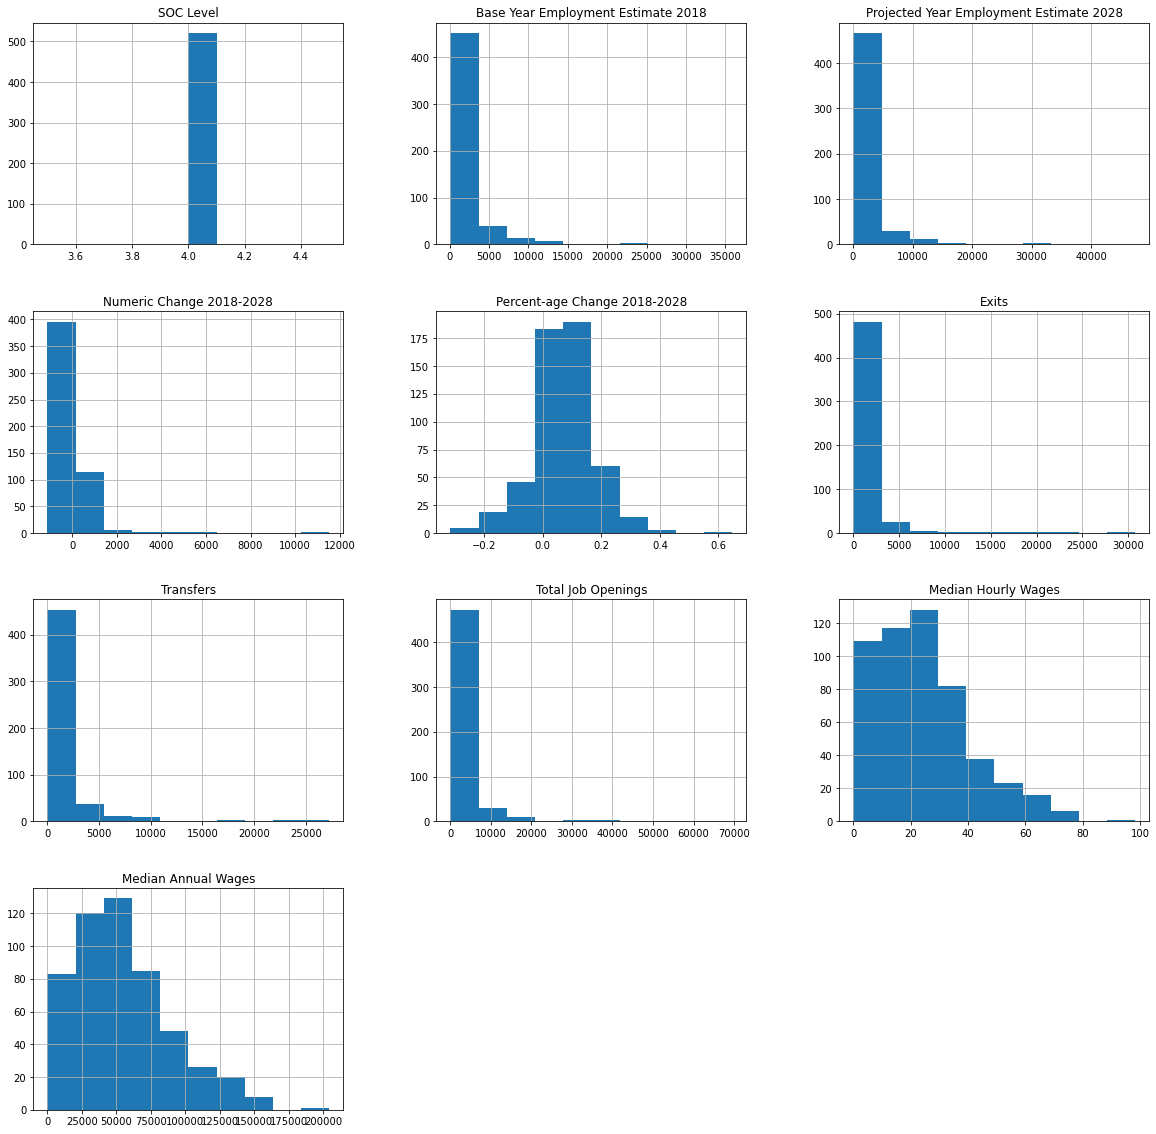

In [14]:
#Plot Histograms for SOC Level 4.
edd_proj_4.hist(figsize=(20,20));

In [15]:
#Create a new DF with limited columns
edd_proj_4_red = edd_proj_4[['SOC Code', 'Occupational Title',
       'Base Year Employment Estimate 2018',
       'Projected Year Employment Estimate 2028', 'Numeric Change 2018-2028',
       'Percent-age Change 2018-2028', 'Entry Level Education', 
       'Work Experience', 'On-the-Job Training']].copy()
edd_proj_4_red.shape

(520, 9)

<AxesSubplot:xlabel='Entry Level Education'>

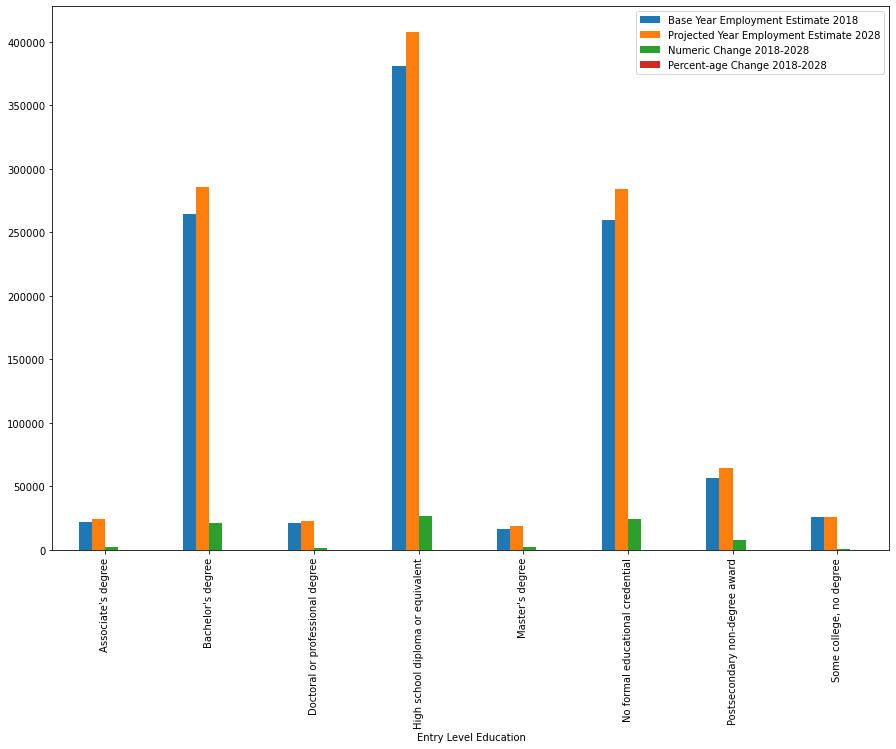

In [16]:
edd_proj_4_red.groupby('Entry Level Education').sum('Numeric Change 2018-2028').plot(kind = 'bar',figsize=(15,10))

<AxesSubplot:xlabel='Work Experience'>

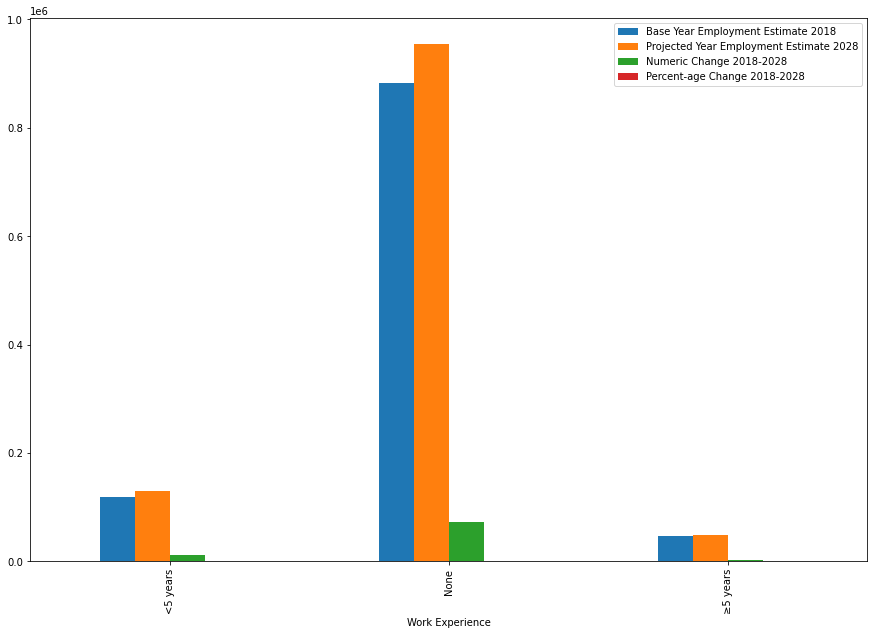

In [17]:
edd_proj_4_red.groupby('Work Experience').sum('Numeric Change 2018-2028').plot(kind = 'bar',figsize=(15,10))

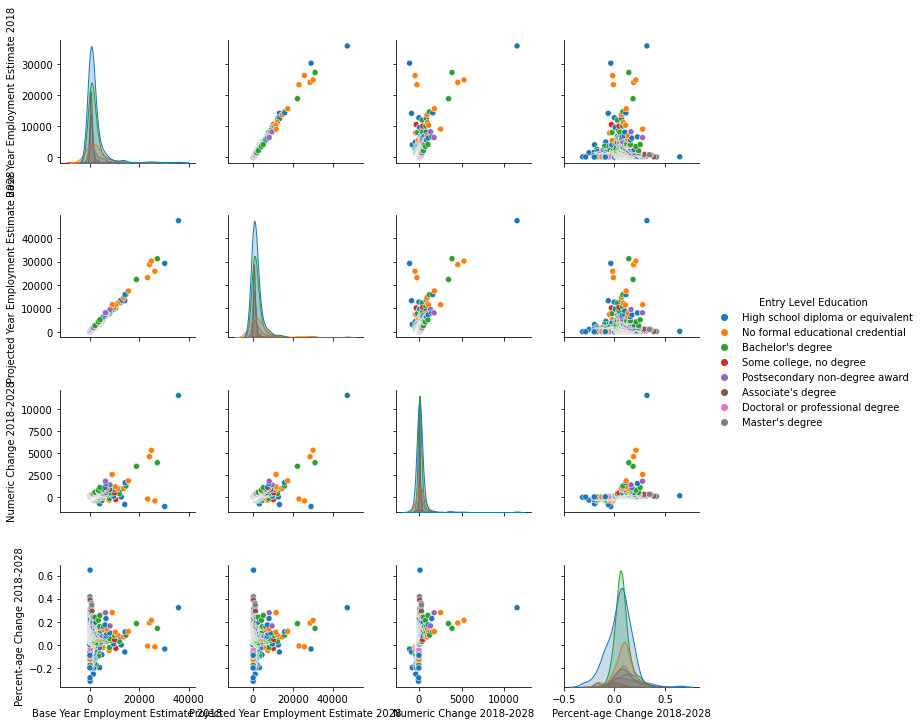

In [18]:
sns.pairplot(edd_proj_4_red, hue = 'Entry Level Education')


### Begin Data review of Educational Attainment with Gender, Race and Ethnicity


In [19]:
print(education.shape)

(90, 6)


In [20]:
#Check first several rows
education.head()

,Race,Ethnicity,Educational attainment,Total,Male,Female
0,White,Not Hispanic,Less Than HS,2288,1212,1076
1,White,Not Hispanic,HS or GED,9339,4588,4751
2,White,Not Hispanic,Some college and AA,16757,7939,8818
3,White,Not Hispanic,BA,9102,4691,4411
4,White,Not Hispanic,Graduate School,4493,2467,2026


In [21]:
#Check the column headings
education.columns

Index(['Race', 'Ethnicity', 'Educational attainment', 'Total', 'Male',
       'Female'],
      dtype='object')

In [22]:
#Check the datatypes
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Race                    90 non-null     object
 1   Ethnicity               90 non-null     object
 2   Educational attainment  90 non-null     object
 3   Total                   90 non-null     int64 
 4   Male                    90 non-null     int64 
 5   Female                  90 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 4.3+ KB


In [23]:
#Evaluate the data for null values
education.isnull().sum()

Race                      0
Ethnicity                 0
Educational attainment    0
Total                     0
Male                      0
Female                    0
dtype: int64

No nulls in the dataset

In [24]:
#Statistical Summary
education.describe()

,Total,Male,Female
count,90.000000,90.000000,90.000000
mean,854.244444,416.277778,437.966667
std,2314.122545,1123.575703,1195.785666
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,59.500000,21.000000,34.500000
75%,644.000000,303.750000,347.250000
max,16757.000000,7939.000000,8818.000000


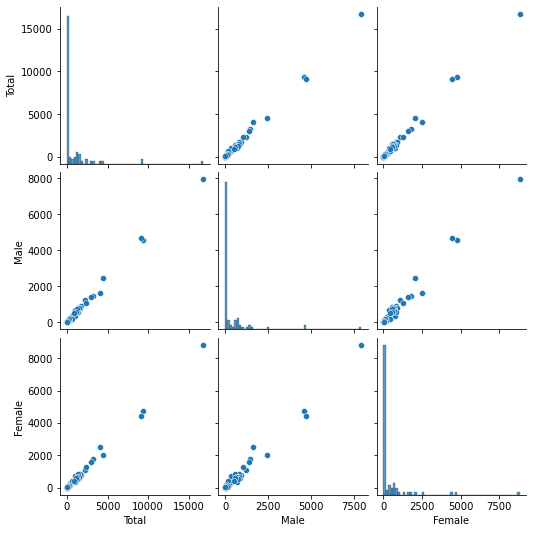

In [25]:
# Create the default pairplot
sns.pairplot(education)

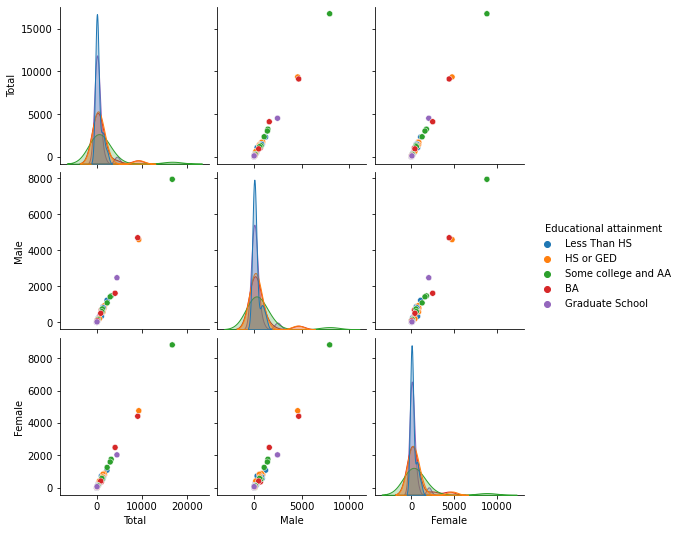

In [26]:
sns.pairplot(education, hue = 'Educational attainment')

In [27]:
#Create a DF for Gender and Educational Attainment
## Remove columns for Race, Ethnicity and Total

edd_gender = education.drop((['Race', 'Ethnicity', 'Total']), axis = 1)
edd_gender.shape

(90, 3)

<AxesSubplot:xlabel='Educational attainment'>

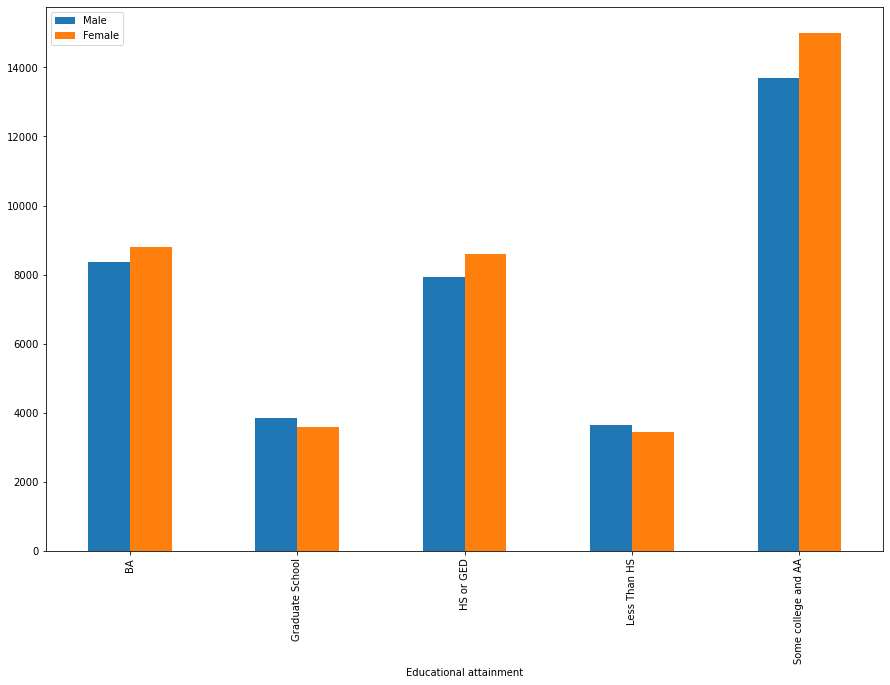

In [28]:
#Plot Gender and Educational attainment
#order = ['Less than HS', 'HS or GED', 'Some College and AA', 'BA', 'Graduate School']
#edd_gender.index('Educational attainment').loc[order].groupby('Educational attainment').sum(['Male', 'Female']).plot(kind = 'bar',figsize=(15,10))
edd_gender.groupby('Educational attainment').sum(['Male', 'Female']).plot(kind = 'bar',figsize=(15,10))

<AxesSubplot:xlabel='Male', ylabel='Educational attainment'>

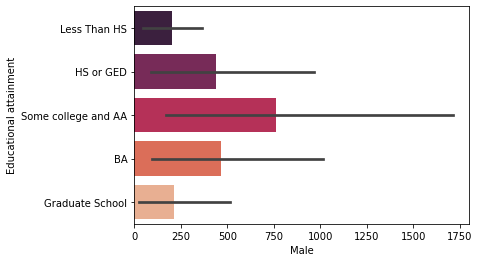

In [56]:
# plot the graph using the default estimator mean
sns.barplot(x ='Male', y ='Educational attainment', data = edd_gender, palette="rocket")


<AxesSubplot:xlabel='Female', ylabel='Educational attainment'>

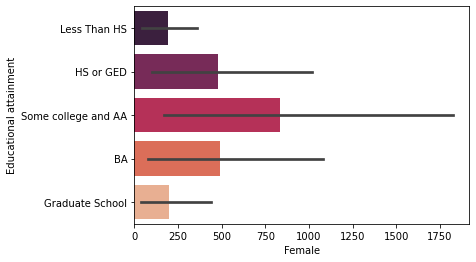

In [57]:
sns.barplot(x ='Female', y ='Educational attainment', data = edd_gender, palette="rocket")

In [31]:
#Create a DF for Race and Educational Attainment
## Remove columns for Male, Female

edd_race_ethnicity = education.drop((['Male', 'Female']), axis = 1)
edd_race_ethnicity.shape

(90, 4)

In [32]:
edd_race_ethnicity.head()

,Race,Ethnicity,Educational attainment,Total
0,White,Not Hispanic,Less Than HS,2288
1,White,Not Hispanic,HS or GED,9339
2,White,Not Hispanic,Some college and AA,16757
3,White,Not Hispanic,BA,9102
4,White,Not Hispanic,Graduate School,4493


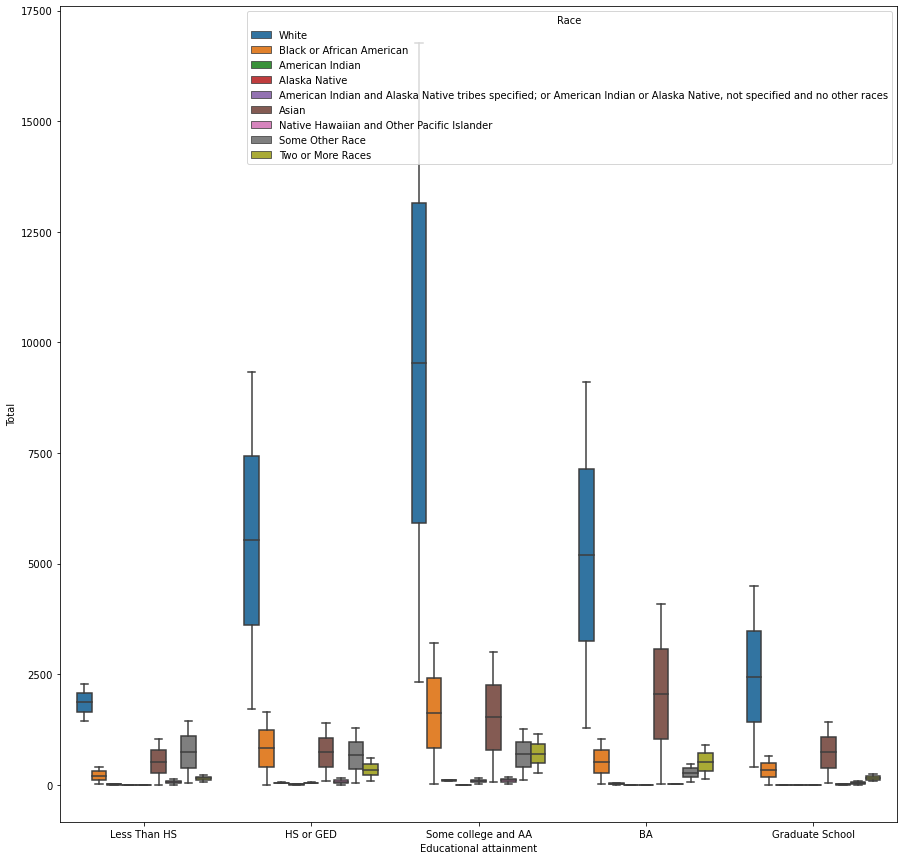

In [33]:
#sns.boxplot(edd_race_ethnicity['Race'], edd_race_ethnicity['Total']);
plt.figure(figsize=(15,15))
ax = sns.boxplot(x='Educational attainment', y="Total", hue = 'Race', data=edd_race_ethnicity, width=.8)

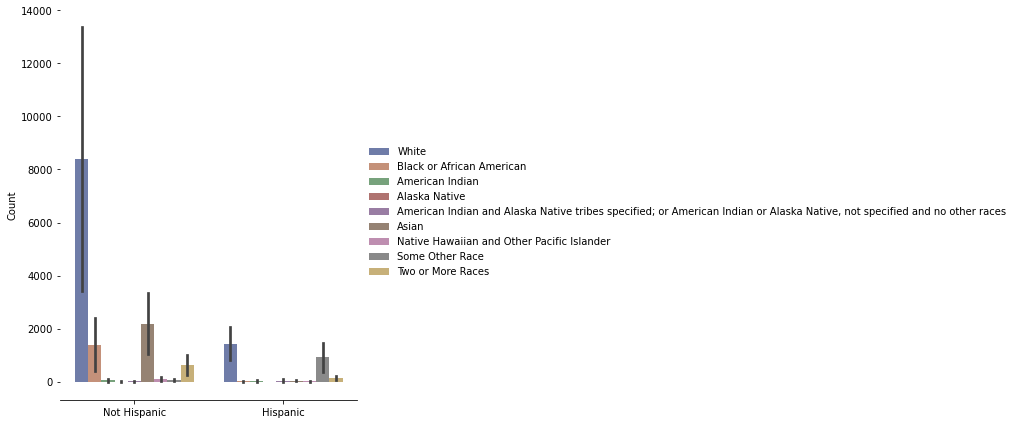

In [34]:
# Draw a nested barplot by Race and Ethnicity
e = sns.catplot(
    data=edd_race_ethnicity, kind="bar",
    x="Ethnicity", y="Total", hue="Race",
    ci="sd", palette="dark", alpha=.6, height=6
)
e.despine(left=True)
e.set_axis_labels("", "Count")
e.legend.set_title("")

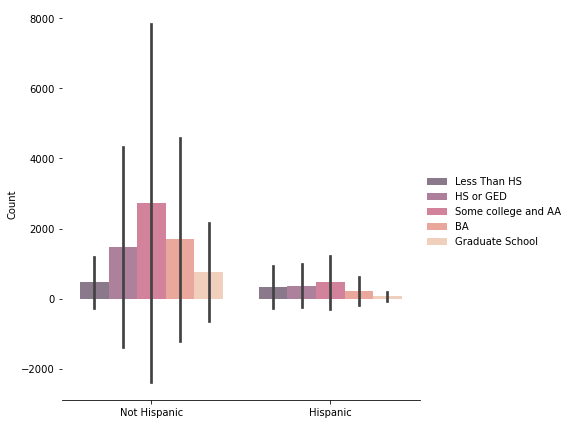

In [58]:
# Draw a nested barplot by Race and Ethnicity
e = sns.catplot(
    data=edd_race_ethnicity, kind="bar",
    x="Ethnicity", y="Total", hue="Educational attainment",
    ci="sd", palette="rocket", alpha=.6, height=6
)
e.despine(left=True)
e.set_axis_labels("", "Count")
e.legend.set_title("")

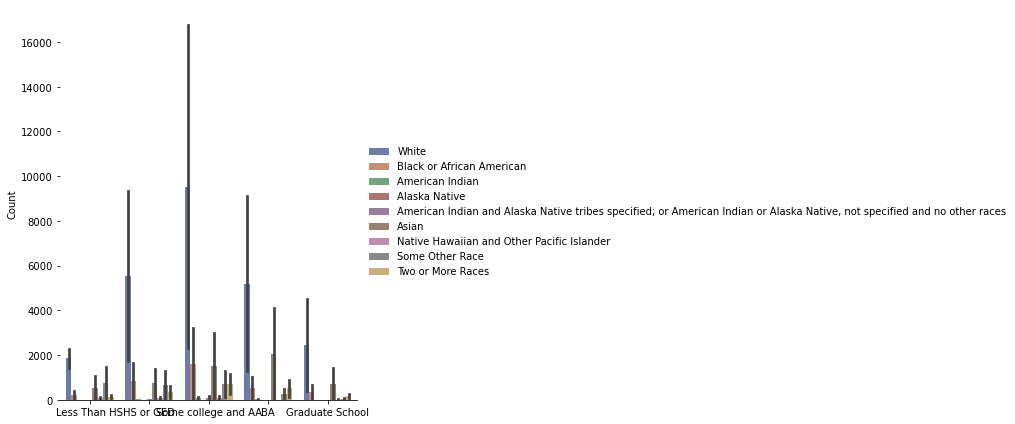

In [36]:
# Draw a nested barplot by Race and Ethnicity
e = sns.catplot(
    data=edd_race_ethnicity, kind="bar",
    x="Educational attainment", y="Total", hue="Race",
    ci="sd", palette="dark", alpha=.6, height=6
)
e.despine(left=True)
e.set_axis_labels("", "Count")
e.legend.set_title("")

### Begin Data review of Technology Resources

####The technology resources file contains summarized census data.

In [37]:
print(technology.shape)

(9, 6)


In [38]:
#Check first several rows
technology.head()

,Label,Description,Type,Total Estimate,Percent Estimate,Unnamed: 5
0,Total households,NaN,NaN,40662,(X),179199.0
1,TYPES OF COMPUTER,Has one or more types of computing devices:,ANY,39135,96.2%,40662.0
2,TYPES OF COMPUTER,Has one or more types of computing devices:,Desktop or laptop,33599,82.6%,97875.0
3,TYPES OF COMPUTER,Has one or more types of computing devices:,Smartphone,37031,91.1%,NaN
4,TYPES OF COMPUTER,Has one or more types of computing devices:,Tablet or other portable wireless computer,26437,65.0%,NaN


In [39]:
#Check first several rows
technology.tail()

,Label,Description,Type,Total Estimate,Percent Estimate,Unnamed: 5
4,TYPES OF COMPUTER,Has one or more types of computing devices:,Tablet or other portable wireless computer,26437,65.0%,NaN
5,TYPES OF COMPUTER,Has one or more types of computing devices:,Other computer,808,2.0%,NaN
6,TYPES OF COMPUTER,No computer,NaN,1527,3.8%,NaN
7,TYPE OF INTERNET SUBSCRIPTIONS,With an Internet subscription,NaN,38237,94.0%,NaN
8,TYPE OF INTERNET SUBSCRIPTIONS,Without an Internet subscription,NaN,2425,6.0%,NaN


In [40]:
#Check the column headings
technology.columns

Index(['Label', 'Description', 'Type', 'Total Estimate', 'Percent Estimate',
       'Unnamed: 5'],
      dtype='object')

In [41]:
#Check the datatypes
technology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Label             9 non-null      object 
 1   Description       8 non-null      object 
 2   Type              5 non-null      object 
 3   Total Estimate    9 non-null      int64  
 4   Percent Estimate  9 non-null      object 
 5   Unnamed: 5        3 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 560.0+ bytes


In [42]:
#Evaluate the data for null values
technology.isnull().sum()

Label               0
Description         1
Type                4
Total Estimate      0
Percent Estimate    0
Unnamed: 5          6
dtype: int64

In [43]:
print(internet.shape)

(12, 5)


In [44]:
#Check first several rows
internet.head()

,Income,Internet,Total Estimate,Percent Estimate,Unnamed: 4
0,"Less than $20,000:",Total Households,4415,NaN,NaN
1,"Less than $20,000:",With dial-up Internet subscription alone,38,0.009,NaN
2,"Less than $20,000:",With a broadband Internet subscription,3398,0.770,NaN
3,"Less than $20,000:",Without an Internet subscription,979,0.222,NaN
4,"$20,000 to $74,999:",Total Households,16476,NaN,NaN


In [45]:
#Check the column headings
internet.columns

Index(['Income', 'Internet', 'Total Estimate', 'Percent Estimate',
       'Unnamed: 4'],
      dtype='object')

In [46]:
#Check the datatypes
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Income            12 non-null     object 
 1   Internet          12 non-null     object 
 2   Total Estimate    12 non-null     int64  
 3   Percent Estimate  9 non-null      float64
 4   Unnamed: 4        0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 608.0+ bytes


In [47]:
#Evaluate the data for null values
internet.isnull().sum()

Income               0
Internet             0
Total Estimate       0
Percent Estimate     3
Unnamed: 4          12
dtype: int64

In [48]:
no_internet = internet[internet['Internet'] == 'Without an Internet subscription'].copy()

<AxesSubplot:xlabel='Income', ylabel='Total Estimate'>

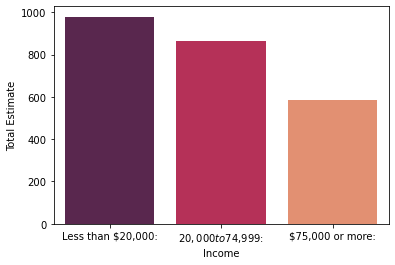

In [54]:
sns.barplot(x ='Income', y ='Total Estimate', data = no_internet, palette="rocket")

<AxesSubplot:xlabel='Income', ylabel='Percent Estimate'>

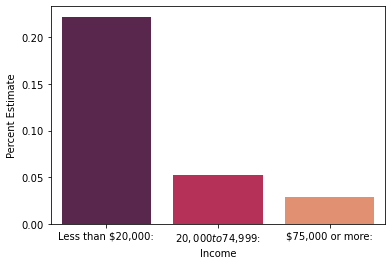

In [55]:
sns.barplot(x ='Income', y ='Percent Estimate', data = no_internet, palette="rocket")